# FlowUniPCMultistepScheduler sigma visualization

This notebook instantiates the local `FlowUniPCMultistepScheduler` implementation and plots the sigma schedule it produces for a configurable number of inference steps.


In [3]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np


try:
    repo_root = Path(__file__).resolve().parents[1]
except NameError:
    repo_root = Path.cwd()

src_path = repo_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

from diffusers.schedulers import FlowUniPCMultistepScheduler


In [6]:
NUM_TRAIN_TIMESTEPS = 1_000
NUM_INFERENCE_STEPS = 35
SHIFT = 1.0
USE_KARRAS_SIGMAS = True


def generate_sigmas(num_inference_steps=NUM_INFERENCE_STEPS, shift=SHIFT, use_karras_sigmas=USE_KARRAS_SIGMAS):
    """Instantiate the scheduler and return the sigma and timestep buffers."""
    scheduler = FlowUniPCMultistepScheduler(
        num_train_timesteps=NUM_TRAIN_TIMESTEPS,
        shift=shift,
        use_karras_sigmas=use_karras_sigmas,
    )
    scheduler.set_timesteps(num_inference_steps=num_inference_steps)

    sigma_values = scheduler.sigmas.detach().cpu().numpy()
    timestep_values = scheduler.timesteps.detach().cpu().numpy()
    return sigma_values, timestep_values


In [13]:
sigma_values, timestep_values = generate_sigmas()


In [21]:
np.allclose(sigma_values[:-1], timestep_values*0.001)

False

In [23]:
timestep_values

array([995, 994, 993, 992, 990, 988, 986, 984, 981, 977, 973, 967, 960,
       951, 941, 927, 910, 889, 863, 831, 791, 742, 684, 618, 543, 462,
       380, 301, 228, 166, 116,  77,  49,  30,  17,   9])

In [22]:
sigma_values

array([0.99502486, 0.9942067 , 0.993232  , 0.9920665 , 0.9906676 ,
       0.988982  , 0.98694307, 0.9844666 , 0.9814467 , 0.9777488 ,
       0.9732026 , 0.9675912 , 0.9606394 , 0.9519976 , 0.94122404,
       0.9277644 , 0.9109316 , 0.8898901 , 0.86365426, 0.8311152 ,
       0.79111844, 0.7426199 , 0.6849421 , 0.6181248 , 0.5433001 ,
       0.46294296, 0.38079414, 0.30132923, 0.22886677, 0.1666508 ,
       0.11629516, 0.07776967, 0.04981578, 0.03052405, 0.01784122,
       0.00990099, 0.        ], dtype=float32)

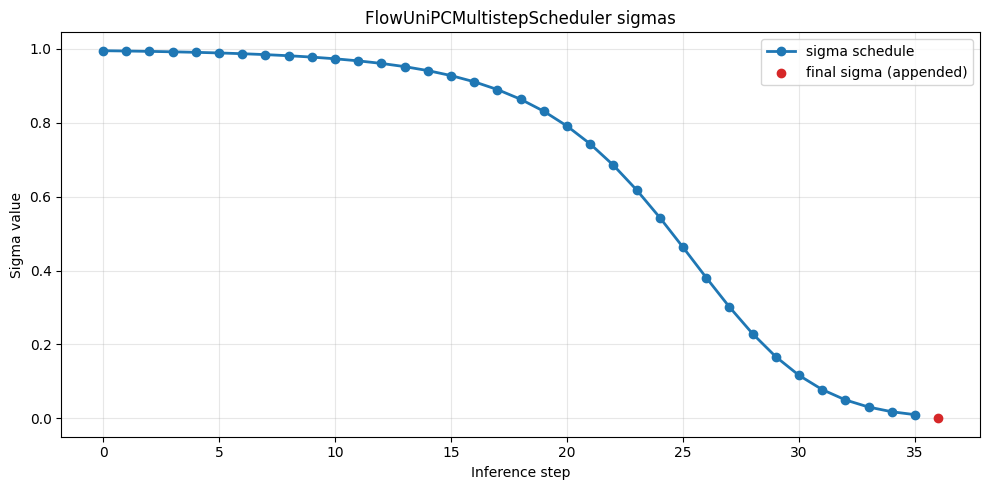

Plotted 36 inference steps + final sigma (total tensor length=37).


In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))
step_axis = np.arange(len(sigma_values) - 1)
ax.plot(step_axis, sigma_values[:-1], marker="o", linewidth=2, label="sigma schedule")
ax.scatter(len(sigma_values) - 1, sigma_values[-1], color="tab:red", zorder=5, label="final sigma (appended)")
ax.set_xlabel("Inference step")
ax.set_ylabel("Sigma value")
ax.set_title("FlowUniPCMultistepScheduler sigmas")
ax.grid(alpha=0.3)
ax.legend()
fig.tight_layout()
plt.show()

print(
    f"Plotted {len(step_axis)} inference steps + final sigma (total tensor length={len(sigma_values)})."
)


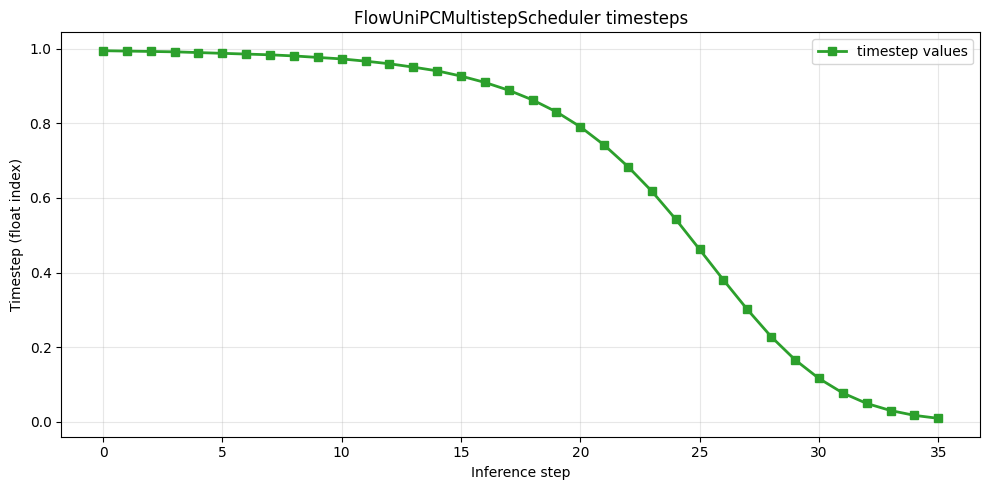

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
timestep_axis = np.arange(len(timestep_values))
ax.plot(timestep_axis, timestep_values * 0.001, marker="s", linewidth=2, color="tab:green", label="timestep values")
ax.set_xlabel("Inference step")
ax.set_ylabel("Timestep (float index)")
ax.set_title("FlowUniPCMultistepScheduler timesteps")
ax.grid(alpha=0.3)
ax.legend()
fig.tight_layout()
plt.show()